### Parametric Classification
* **Name Surname, email:** Gonul Aycı, aycignl@gmail.com
* **Location, Date:** Bogazici University, Mar. 2018
* **Description:** Assignment-I
    - Estimate class priors, means and variances using the training data.
    - Plot *training data*, estimated likelihoods and posteriors together on the same plot. Use different symbols for different classes. 
    - Use your estimated discriminants to classify the test data and report the confusion matrix on the *test data*.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import itertools

In [2]:
test_data = "h_tes.txt"
train_data = "h_tra.txt"

test_lines = [line.rstrip('\n') for line in open(test_data)]
train_lines = [line.rstrip('\n') for line in open(train_data)]

In [3]:
test_list = [[float(i) for i in index1.split()] for index1 in test_lines]
test_list = np.asarray(test_list)
train_list = [[float(j) for j in index2.split()] for index2 in train_lines]
train_list = np.asarray(train_list)
train_class_one = [a[1] for a in train_list]
train_class_two = [b[2] for b in train_list]

In [4]:
total = len(train_class_one)
count1 = sum([1 for i in range(total) if train_class_one[i] == 1])
count2 = sum([1 for i in range(total) if train_class_two[i] == 1])

In [5]:
train_class_1 = [a[0] for a in train_list[train_list[:,1] == 1.0]]
train_class_2 = [b[0] for b in train_list[train_list[:,2] == 1.0]]

#### i. Estimate class priors, means and variances using the training data.

In [6]:
mean_1 = np.mean(train_class_1)
mean_2 = np.mean(train_class_2)
variance_1 = np.var(train_class_1)
variance_2 = np.var(train_class_2)
prior_1 = np.divide(count1, total)
prior_2 = np.divide(count2, total)

In [7]:
def likelihood_1(x1): 
    return 1/(sigma_1 * np.sqrt(2 * np.pi)) * np.exp( - (x1 - mean_1)**2 / (2 * sigma_1**2)) 

def likelihood_2(x2):
    return 1/(sigma_2 * np.sqrt(2 * np.pi)) * np.exp( - (x2 - mean_2)**2 / (2 * sigma_2**2)) 

def posterior_1(x1):
    return (prior_1 * likelihood_1(x1)) / (prior_1 * likelihood_1(x1) + prior_2 * likelihood_2(x1))
                                                     
def posterior_2(x2):
    return (prior_2 * likelihood_2(x2)) / (prior_1 * likelihood_1(x2) + prior_2 * likelihood_2(x2))                                       

#### ii. Plot *training data*, estimated likelihoods and posteriors together on the same plot. Use different symbols for different classes.

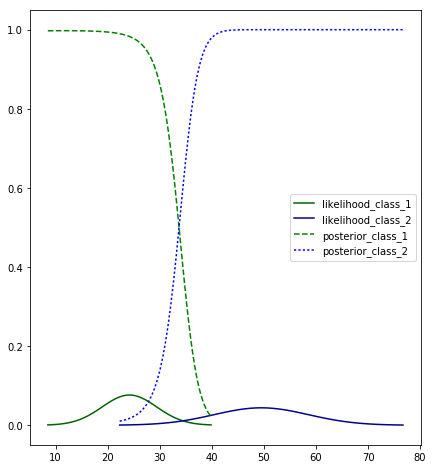

In [8]:
plt.figure(figsize=(7,8))

sigma_1 = math.sqrt(variance_1)
sigma_2 = math.sqrt(variance_2)

x_c1 = np.linspace(mean_1 - 3*sigma_1, mean_1 + 3*sigma_1, 100)
x_c2 = np.linspace(mean_2 - 3*sigma_2, mean_2 + 3*sigma_2, 100)

plt.plot(x_c1,likelihood_1(x_c1), color='darkgreen', label = 'likelihood_class_1')
plt.plot(x_c2,likelihood_2(x_c2), color='darkblue', label = 'likelihood_class_2')
plt.plot(x_c1,posterior_1(x_c1), color='green', linestyle = '--', label = 'posterior_class_1')
plt.plot(x_c2,posterior_2(x_c2), color='blue', linestyle = ':', label = 'posterior_class_2')
plt.legend()
plt.show()

#### iii. Use your estimated discriminants to classify the test data and report the confusion matrix on the *test data*.

In [9]:
# create a confusion matrix
confusion_matrix = [[0 for x in range(2)] for y in range(2)]  

for row in test_list:
    if row[1] == 1.0:
        if posterior_1(row[0]) < .5:
            confusion_matrix[0][1] += 1 
        else:
            confusion_matrix[0][0] += 1
    else:
        if posterior_2(row[0]) >= .5:
            confusion_matrix[1][1] += 1 
        else:
            confusion_matrix[1][0] += 1

In [10]:
confusion_matrix = np.asarray(confusion_matrix)

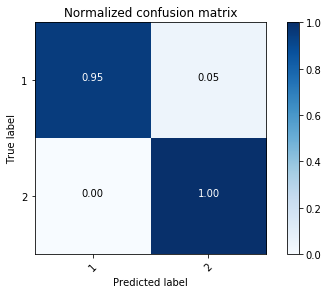

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['1', '2'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()